In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

In [2]:
#file1 = '/content/drive/My Drive/Colab Notebooks/K8 Reviews v0.2.csv'
#df = pd.read_csv(file1)
df = pd.read_csv('K8 Reviews v0.2.csv')
df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [3]:
df.shape

(14675, 2)

In [4]:
df['clean_review'] = df['review'].apply(lambda x: str(x).lower())
df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


In [5]:
df['clean_review'] = df['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dr...
2,1,when I will get my 10% cash back.... its alrea...,when i will get my cash back its alrea...
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


In [6]:
df['clean_review'] = df['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dra...
2,1,when I will get my 10% cash back.... its alrea...,when i will get my cash back its already january
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


In [7]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

In [8]:
df['clean_review'] = df['clean_review'].apply(lambda x: word_tokenize(x))
df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery..."
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre..."
3,1,Good,[good]
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t..."


In [9]:
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [10]:
df['clean_review'] = df['clean_review'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, need, updates, improvements]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,1,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,1,Good,[good]
4,0,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."


In [11]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

In [12]:
df['clean_review'] = df['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, need, update, improvement]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,1,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,1,Good,[good]
4,0,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."


In [13]:
#df['clean_review'] = df['clean_review'].apply\
#(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [14]:
df['clean_review'] = df['clean_review'].apply\
(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN' or nltk.pos_tag([word])[0][1] == 'NNP' or nltk.pos_tag([word])[0][1] == 'NNS' or nltk.pos_tag([word])[0][1] == 'NNPS'])

In [15]:
#!pip install gensim

In [16]:
import gensim
from gensim import corpora

In [17]:
dictionary = corpora.Dictionary(df['clean_review'])
print(dictionary)

Dictionary(7286 unique tokens: ['improvement', 'need', 'update', 'amazon', 'backup']...)


In [18]:
doc_term_matrix = df['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

0                             [(0, 1), (1, 1), (2, 1)]
1    [(3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1...
2                                   [(19, 1), (20, 1)]
3                                                   []
4                  [(3, 2), (21, 1), (22, 3), (23, 1)]
5        [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]
6    [(14, 1), (22, 1), (29, 1), (30, 1), (31, 1), ...
7                           [(5, 1), (36, 1), (37, 1)]
8    [(14, 2), (22, 2), (23, 2), (34, 1), (38, 1), ...
9                 [(44, 1), (45, 1), (46, 1), (47, 1)]
Name: clean_review, dtype: object

In [19]:
from IPython.display import clear_output
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=101)
clear_output()

In [20]:
ldamodel.print_topics()

[(0,
  '0.145*"money" + 0.080*"waste" + 0.071*"heat" + 0.052*"value" + 0.051*"worth" + 0.045*"speaker" + 0.034*"star" + 0.026*"buying" + 0.020*"problem" + 0.019*"experience"'),
 (1,
  '0.053*"update" + 0.049*"network" + 0.048*"issue" + 0.042*"call" + 0.036*"problem" + 0.032*"lenovo" + 0.030*"screen" + 0.028*"work" + 0.022*"software" + 0.021*"handset"'),
 (2,
  '0.247*"battery" + 0.057*"fast" + 0.051*"phone" + 0.044*"backup" + 0.042*"charge" + 0.038*"hour" + 0.034*"drain" + 0.026*"life" + 0.025*"time" + 0.020*"heat"'),
 (3,
  '0.282*"camera" + 0.126*"quality" + 0.034*"front" + 0.030*"sound" + 0.029*"mode" + 0.027*"performance" + 0.024*"depth" + 0.022*"rear" + 0.022*"display" + 0.016*"picture"'),
 (4,
  '0.094*"note" + 0.078*"lenovo" + 0.025*"phone" + 0.023*"feature" + 0.021*"dolby" + 0.019*"android" + 0.016*"light" + 0.016*"music" + 0.014*"call" + 0.014*"speaker"'),
 (5,
  '0.434*"phone" + 0.035*"service" + 0.031*"lenovo" + 0.029*"month" + 0.026*"time" + 0.023*"day" + 0.016*"bought" + 0

In [21]:
#!pip install pyLDAvis

In [22]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel,doc_term_matrix,dictionary)
vis

C:\Users\Admin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.074541  0.095913       1        1  13.731662
2      0.164543 -0.089593       2        1  13.466450
1      0.049931  0.185539       3        1  11.476407
3      0.062770 -0.222253       4        1  10.828217
10    -0.080530  0.284923       5        1   9.363213
9      0.136564 -0.027611       6        1   9.151965
5      0.184187  0.108949       7        1   9.074981
8      0.171461 -0.121368       8        1   6.960109
6     -0.140817 -0.156533       9        1   6.012934
0     -0.129521  0.028732      10        1   4.457292
11    -0.247625 -0.062292      11        1   2.805565
7     -0.245505 -0.024405      12        1   2.671206, topic_info=               Term         Freq        Total Category  logprob  loglift
22            phone  7351.000000  7351.000000  Default  30.0000  30.0000
15           mobile  2606.000000  2606.000000  Default  29.0000  29.0000
5           battery  3489.000000  3489.000000  Default  28.0000  28.0000
81           camera  3525.000000  3525.000000  Default  27.0000  27.0000
70          product  2330.000000  2330.000000  Default  26.0000  26.0000
..              ...          ...          ...      ...      ...      ...
121  disappointment    18.630693    27.691265  Topic12  -4.9946   3.2263
603          sensor    54.124650   165.593152  Topic12  -3.9281   2.5044
468         invoice    19.979104    40.374383  Topic12  -4.9247   2.9191
856           cheap    24.019142    61.754788  Topic12  -4.7406   2.6783
978         storage    17.418454    62.795765  Topic12  -5.0619   2.3403

[643 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3399     11  0.926881       abhi
414      11  0.981291  accessory
2643     11  0.948289      accha
1762      5  0.960099    adapter
1165      3  0.977048       alot
...     ...       ...        ...
43        7  0.890076       year
288       6  0.950631     yellow
461       6  0.265116       zero
461      10  0.729069       zero
452       6  0.963574       zoom

[899 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 4, 11, 10, 6, 9, 7, 1, 12, 8])

In [23]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=df['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Coherence Score:  0.5671985649168331


In [24]:
def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=101)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [25]:
topic_num,cv_score = calculate_topic_cv(ldamodel,df['clean_review'],dictionary,20)

In [26]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
3,0.639922
4,0.594964
10,0.574504
6,0.573905
5,0.570366
2,0.570009
12,0.554739
9,0.553811
7,0.552926


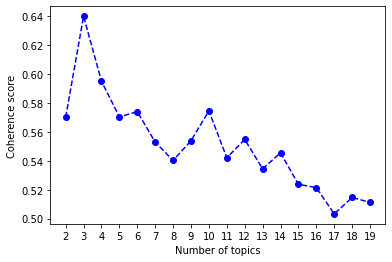

In [28]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='blue', marker='o', linestyle='dashed')
plt.xticks(range(2,20))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

# We will be going with number of topic 6 as with  3 or 4 topics words might not be classified in the right manner

In [25]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word=dictionary, passes=10,random_state=101)
clear_output()
print(CoherenceModel(model=ldamodel,texts=df['clean_review'],\
                     dictionary=dictionary , coherence='c_v').get_coherence())

0.6030238608678619


In [26]:
pyLDAvis.gensim_models.prepare(ldamodel,doc_term_matrix,dictionary)

C:\Users\Admin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.063380 -0.014727       1        1  22.155001
2     -0.029978 -0.232990       2        1  21.368819
4      0.142317 -0.017986       3        1  18.825657
3      0.253294  0.002174       4        1  17.319949
5     -0.027777  0.269249       5        1  11.957087
0     -0.274477 -0.005720       6        1   8.373487, topic_info=         Term         Freq        Total Category  logprob  loglift
5     battery  3296.000000  3296.000000  Default  30.0000  30.0000
70    product  2040.000000  2040.000000  Default  29.0000  29.0000
81     camera  3248.000000  3248.000000  Default  28.0000  28.0000
15     mobile  2436.000000  2436.000000  Default  27.0000  27.0000
23    problem  1548.000000  1548.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
16     please    55.020554   374.188628   Topic6  -5.0543   0.5630
3      amazon    53.912205   848.976575   Topic6  -5.0746  -0.2766
1518   lenova    31.846689    58.320126   Topic6  -5.6010   1.8751
697    review    37.865637   197.090189   Topic6  -5.4279   0.8305
33       heat    31.789135   572.767100   Topic6  -5.6028  -0.4113

[367 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1762      6  0.956370  adapter
3         1  0.362790   amazon
3         5  0.573632   amazon
3         6  0.063606   amazon
1432      5  0.932294  amazone
...     ...       ...      ...
124       4  0.006331    worth
124       6  0.993995    worth
48        5  0.963788    wrost
461       6  0.975930     zero
452       2  0.964504     zoom

[502 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 6, 1])

In [27]:
ldamodel.print_topics()

[(0,
  '0.073*"money" + 0.073*"problem" + 0.048*"phone" + 0.048*"heating" + 0.041*"waste" + 0.036*"worth" + 0.026*"return" + 0.026*"value" + 0.022*"volta" + 0.017*"want"'),
 (1,
  '0.050*"phone" + 0.046*"mobile" + 0.038*"lenovo" + 0.031*"issue" + 0.024*"update" + 0.021*"screen" + 0.021*"call" + 0.020*"network" + 0.019*"problem" + 0.017*"time"'),
 (2,
  '0.149*"battery" + 0.084*"phone" + 0.040*"heating" + 0.036*"issue" + 0.034*"fast" + 0.026*"backup" + 0.025*"charge" + 0.022*"heat" + 0.022*"problem" + 0.021*"hour"'),
 (3,
  '0.142*"camera" + 0.078*"mobile" + 0.055*"quality" + 0.038*"phone" + 0.033*"performance" + 0.030*"awesome" + 0.026*"price" + 0.020*"feature" + 0.020*"front" + 0.015*"processor"'),
 (4,
  '0.052*"note" + 0.045*"lenovo" + 0.043*"phone" + 0.020*"speaker" + 0.019*"feature" + 0.017*"device" + 0.016*"android" + 0.015*"sound" + 0.015*"camera" + 0.014*"quality"'),
 (5,
  '0.164*"product" + 0.160*"phone" + 0.040*"amazon" + 0.031*"price" + 0.022*"excellent" + 0.020*"lenovo" + 

In [35]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])
topic_lookup_data['Topic_Name'] = ['Budget Review','Mixed issues','Heating issue','Feature Reviews','Connectivity','Service Review']
topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,Budget Review,"['money', 'problem', 'phone', 'heating', 'waste', 'worth', 'return', 'value', 'volta', 'want']"
1,1,Mixed issues,"['phone', 'mobile', 'lenovo', 'issue', 'update', 'screen', 'call', 'network', 'problem', 'time']"
2,2,Heating issue,"['battery', 'phone', 'heating', 'issue', 'fast', 'backup', 'charge', 'heat', 'problem', 'hour']"
3,3,Feature Reviews,"['camera', 'mobile', 'quality', 'phone', 'performance', 'awesome', 'price', 'feature', 'front', 'processor']"
4,4,Connectivity,"['note', 'lenovo', 'phone', 'speaker', 'feature', 'device', 'android', 'sound', 'camera', 'quality']"
5,5,Service Review,"['product', 'phone', 'amazon', 'price', 'excellent', 'lenovo', 'delivery', 'awesome', 'service', 'super']"
